In [1]:
#pip install pandas 

In [2]:
#pip install git+https://bitbucket.org/jsteven5/tasplot.git

In [3]:
#pip install xlwt openpyxl xlsxwriter xlrd 

In [2]:
#can remove this one VESIcal can be installed via pip
import sys
sys.path.insert(0, '../')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import VESIcal as v


# Loading Plotting Details

In [4]:
plt.rcParams["font.family"] = 'arial'
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
%matplotlib inline
sns.set(style="ticks", context="poster",rc={"grid.linewidth": 1,"xtick.major.width": 1,"ytick.major.width": 1, 'patch.edgecolor': 'black'})

plt.style.use("seaborn-colorblind")
#jtplot.style()
mpl.rcParams['patch.linewidth'] = 1
mpl.rcParams['axes.linewidth'] = 1 # set the value globally


# Loading Oxide Masses

In [5]:
oxides = ['SiO2', 'TiO2', 'Al2O3', 'Fe2O3', 'Cr2O3', 'FeO', 'MnO', 'MgO', 'NiO', 'CoO', 'CaO', 'Na2O', 'K2O', 'P2O5', 'H2O', 'CO2']
oxideMass = {'SiO2': 28.085+32, 'MgO': 24.305+16, 'FeO': 55.845+16, 'CaO': 40.078+16, 'Al2O3': 2*26.982+16*3, 'Na2O': 22.99*2+16,
			 'K2O': 39.098*2+16, 'MnO': 54.938+16, 'TiO2': 47.867+32, 'P2O5': 2*30.974+5*16, 'Cr2O3': 51.996*2+3*16,
			 'NiO': 58.693+16, 'CoO': 28.01+16, 'Fe2O3': 55.845*2+16*3,
			 'H2O': 18.02, 'CO2': 44.01}
CationNum = {'SiO2': 1, 'MgO': 1, 'FeO': 1, 'CaO': 1, 'Al2O3': 2, 'Na2O': 2,
			 'K2O': 2, 'MnO': 1, 'TiO2': 1, 'P2O5': 2, 'Cr2O3': 2,
			 'NiO': 1, 'CoO': 1, 'Fe2O3': 2, 'H2O': 2, 'CO2': 1}

# Loading in North Arch dataset (Dixon et al., 1997)

In [6]:
# This is the dataset that Dixon, 1997 use to define the correlation between Pi and SiO2
Dixonfile = v.ExcelFile('Dixon_1997_NorthArchData.xlsx', input_type='wtpercent', label='Sample')
Dixondata = Dixonfile.data
Dixondata.head()

,SiO2,Al2O3,Fe2O3,FeO,MnO,MgO,CaO,Na2O,K2O,P2O5,TiO2,NiO,CoO,H2O,CO2,Cr2O3
Sample,,,,,,,,,,,,,,,,
North Arch,43.6,14.5,0,11.7,0.19,7.01,13.2,3.97,1.12,0.50,2.36,0,0,0,0,0
North Arch,43.4,13.9,0,12.0,0.19,7.89,12.2,4.06,0.97,0.48,2.24,0,0,0,0,0
North Arch,44.9,14.6,0,11.8,0.18,7.55,12.3,3.81,0.85,0.38,2.16,0,0,0,0,0
North Arch,46.0,14.6,0,11.3,0.19,7.33,12.4,3.55,0.74,0.34,1.88,0,0,0,0,0
North Arch,45.0,14.2,0,11.4,0.16,8.71,11.6,3.44,0.78,0.32,1.89,0,0,0,0,0


# Calculating Cation fractions (North Arch Data, Dixon et al., 1997)

In [7]:
for ind,row in Dixondata.iterrows():
    for ox in oxides:
        Dixondata.loc[ind, ox + 'molar']=((row[ox]*CationNum[ox])/oxideMass[ox]) # helps us get desired column name with its actual name, rather than its index. If by number, do by iloc. 
        #oxide_molar[ind, ox]=ox+'molar'
    Dixondata.loc[ind,'sum']=sum(Dixondata.loc[ind, ox+'molar'] for ox in oxides)
    for ox in oxides:
        Dixondata.loc[ind, ox + 'norm']=Dixondata.loc[ind, ox+'molar']/Dixondata.loc[ind, 'sum']
            # helps us get desired column name with its actual name, rather than its index. If by number, do by iloc. 
Dixondata.head() 

,SiO2,Al2O3,Fe2O3,FeO,MnO,MgO,CaO,Na2O,K2O,P2O5,...,MnOnorm,MgOnorm,NiOnorm,CoOnorm,CaOnorm,Na2Onorm,K2Onorm,P2O5norm,H2Onorm,CO2norm
Sample,,,,,,,,,,,,,,,,,,,,,
North Arch,43.6,14.5,0,11.7,0.19,7.01,13.2,3.97,1.12,0.50,...,0.001593,0.090168,0.0,0.0,0.13304,0.073499,0.01176,0.00438,0.0,0.0
North Arch,43.4,13.9,0,12.0,0.19,7.89,12.2,4.06,0.97,0.48,...,0.001593,0.090168,0.0,0.0,0.13304,0.073499,0.01176,0.00438,0.0,0.0
North Arch,44.9,14.6,0,11.8,0.18,7.55,12.3,3.81,0.85,0.38,...,0.001593,0.090168,0.0,0.0,0.13304,0.073499,0.01176,0.00438,0.0,0.0
North Arch,46.0,14.6,0,11.3,0.19,7.33,12.4,3.55,0.74,0.34,...,0.001593,0.090168,0.0,0.0,0.13304,0.073499,0.01176,0.00438,0.0,0.0
North Arch,45.0,14.2,0,11.4,0.16,8.71,11.6,3.44,0.78,0.32,...,0.001593,0.090168,0.0,0.0,0.13304,0.073499,0.01176,0.00438,0.0,0.0


# Loading in user data

In [8]:
# Need to work out why complex sample names fed in as in the manuscript cause errors - but if you add a blank label column they dont. 
#myfile = v.ExcelFile('example_data_Basaltic_MI_labelSample.xlsx', input_type='wtpercent')
data=pd.read_excel('example_data_Basaltic_MI_TuckerBennet.xlsx', sheet_name='Sheet1', index_col=0)
FeOT=data['FeO']+data['Fe2O3']*0.899999
data['FeOT']=FeOT
data.head()


,SampleName,SiO2,TiO2,Al2O3,Fe2O3,Cr2O3,FeO,MnO,MgO,NiO,CoO,CaO,Na2O,K2O,P2O5,H2O,CO2,Press,Temp,FeOT
Label,,,,,,,,,,,,,,,,,,,,
1,"Kil3-6_1a -Tucker et al., 2019",48.249207,2.222114,11.692194,1.813687,0,9.249894,0.079999,14.183817,0,0,9.892732,1.810522,0.352014,0.210479,0.424695,0.002873,62.5,1299.094712,10.882210
2,"Kil3-6_2a-Tucker et al., 2019",49.000000,NaN,NaN,NaN,0,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0.437358,0.002971,81.0,NaN,NaN
3,"Kil3-6_3a -Tucker et al., 2019",48.295691,2.165357,11.755584,1.828449,0,9.325182,0.084045,13.403980,0,0,10.052578,2.268198,0.373328,0.204452,0.425984,0.006786,128.0,1283.419991,10.970784
4,"Kil3-6_4a -Tucker et al., 2019",49.124079,2.360984,12.172833,1.810362,0,9.232937,0.098809,11.997699,0,0,10.308188,2.001863,0.396512,0.238996,0.437758,0.004984,124.5,1255.153759,10.862261
5,"Kil3-6_4b -Tucker et al., 2019",49.231191,2.311146,11.813627,1.814450,0,9.253789,0.088162,12.513518,0,0,10.178205,1.909335,0.369252,0.229482,0.469271,0.003527,95.5,1265.521704,10.886793


# Calculating Cation fractions (user data)

In [9]:
for ind,row in data.iterrows():
    for ox in oxides:
        data.loc[ind, ox + 'molar']=((row[ox]*CationNum[ox])/oxideMass[ox]) # helps us get desired column name with its actual name, rather than its index. If by number, do by iloc. 
        #oxide_molar[ind, ox]=ox+'molar'
    data.loc[ind,'sum']=sum(data.loc[ind, ox+'molar'] for ox in oxides)
    for ox in oxides:
        data.loc[ind, ox + 'norm']=data.loc[ind, ox+'molar']/data.loc[ind, 'sum']
            # helps us get desired column name with its actual name, rather than its index. If by number, do by iloc. 




# Loading in datasets for calibration models

In [10]:
# Will update Dixon, 1997 once Jackie can get into her office as some of the data is unpublished so I can't find it
#CO2 only
df_Eguchi_CO2= pd.read_excel('Solubility_Datasets_V1.xlsx', sheet_name='Eguchi_CO2', index_col=0)
df_Allison_CO2= pd.read_excel('Solubility_Datasets_V1.xlsx', sheet_name='Allison_CO2', index_col=0)
df_Dixon_CO2= pd.read_excel('Solubility_Datasets_V1.xlsx', sheet_name='Dixon_CO2', index_col=0)
df_MagmaSat_CO2= pd.read_excel('Solubility_Datasets_V1.xlsx', sheet_name='MagmaSat_CO2', index_col=0)
df_Shishkina_CO2=pd.read_excel('Solubility_Datasets_V1.xlsx', sheet_name='Shishkina_CO2', index_col=0)

#H2O Only
df_Iacono_H2O= pd.read_excel('Solubility_Datasets_V1.xlsx', sheet_name='Iacono_H2O', index_col=0)
df_Shishkina_H2O=pd.read_excel('Solubility_Datasets_V1.xlsx', sheet_name='Shishkina_H2O', index_col=0)
df_MagmaSat_H2O= pd.read_excel('Solubility_Datasets_V1.xlsx', sheet_name='MagmSat_H2OExt', index_col=0)
df_Dixon_H2O=pd.read_excel('Solubility_Datasets_V1.xlsx', sheet_name='Dixon_H2O', index_col=0)
df_Moore_H2O=pd.read_excel('Solubility_Datasets_V1.xlsx', sheet_name='Moore_H2O', index_col=0)

#Mixed CO2-H2O
df_Iacono_CO2H2O= pd.read_excel('Solubility_Datasets_V1.xlsx', sheet_name='Iacono_H2O-CO2', index_col=0)
df_MagmaSat_CO2H2O= pd.read_excel('Solubility_Datasets_V1.xlsx', sheet_name='MagmaSat_CO2H2O', index_col=0)

## Kayla's code to create a hard-coded version of these excel sheets

In [55]:
import math
f= open("hard_coded_calibrations.py","w+")
list_of_models=[df_Eguchi_CO2,
df_Allison_CO2,
df_Dixon_CO2,
df_MagmaSat_CO2,
df_Shishkina_CO2,
df_Iacono_H2O,
df_Shishkina_H2O,
df_MagmaSat_H2O,
df_Dixon_H2O,
df_Moore_H2O,
df_Iacono_CO2H2O,
df_MagmaSat_CO2H2O]

list_of_modelnames=['df_Eguchi_CO2',
'df_Allison_CO2',
'df_Dixon_CO2',
'df_MagmaSat_CO2',
'df_Shishkina_CO2',
'df_Iacono_H2O',
'df_Shishkina_H2O',
'df_MagmaSat_H2O',
'df_Dixon_H2O',
'df_Moore_H2O',
'df_Iacono_CO2H2O',
'df_MagmaSat_CO2H2O']

for i in range(len(list_of_models)):
    current = list_of_models[i]
    oxides = ['SiO2', 'TiO2', 'Al2O3', 'Fe2O3', 'Cr2O3', 'FeO', 'MnO', 'MgO', 'NiO', 'CoO', 'CaO', 'Na2O', 'K2O', 'P2O5',
              'H2O', 'CO2', 'Na2O+K2O']

    f.write("\n")
    f.write(str(list_of_modelnames[i])+" = pd.DataFrame({ \n")
    for oxide in oxides:
        iterno = 1
        if oxide in current.columns.values:
            f.write("'" + (str(oxide)+"': ["))
            for index, row in current.iterrows():
                if math.isnan(row[oxide]):
                    f.write("float('nan')")
                else:
                    f.write(str(row[oxide]))
                if iterno < len(current.index):
                    f.write(",")
                iterno += 1
            f.write("], \n")
    f.write(" }) \n")

# Subdividing up the Allison dataset by the different systems

In [14]:
#San Francisco Volcanic Field
df_Allison_CO2_SFVF=df_Allison_CO2.loc[df_Allison_CO2['Location']=='SFVF']
#Sunset Crater
df_Allison_CO2_SunsetCrater=df_Allison_CO2.loc[df_Allison_CO2['Location']=='SunsetCrater']
#Erebus
df_Allison_CO2_Erebus=df_Allison_CO2.loc[df_Allison_CO2['Location']=='Erebus']
#Vesuvius
df_Allison_CO2_Vesuvius=df_Allison_CO2.loc[df_Allison_CO2['Location']=='Vesuvius']
#Etna
df_Allison_CO2_Etna=df_Allison_CO2.loc[df_Allison_CO2['Location']=='Etna']
#Stromboli
df_Allison_CO2_Stromboli=df_Allison_CO2.loc[df_Allison_CO2['Location']=='Stromboli']

# TAS diagram for all models

[]


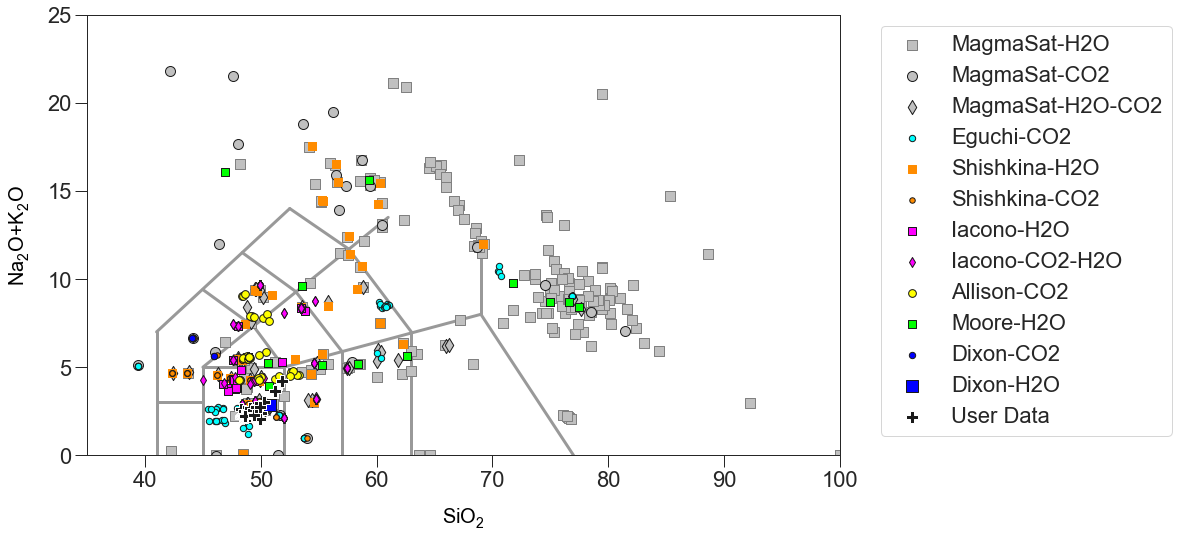

In [15]:
x="SiO2"
y1="Na2O"
y2="K2O"
fig, ax1 = plt.subplots(figsize = (17,8)) # adjust dimensions of figure here
ax1.set_xlim([35, 100]) # adjust x limits here if you want to focus on a specific part of compostional space
ax1.set_ylim([0, 25]) # adjust y limits here
font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }
plt.xlabel('SiO$_2$', fontdict=font, labelpad = 15)
plt.ylabel('Na$_2$O+K$_2$O', fontdict=font, labelpad = 15)
v.add_LeMaitre_fields(ax1)
#################################################################################################
# Plotting literature data
plt.scatter(df_MagmaSat_H2O['SiO2'],df_MagmaSat_H2O['Na2O+K2O'],
            s=100, edgecolors='gray', facecolors='silver', marker='s', label = 'MagmaSat-H2O')
plt.scatter(df_MagmaSat_CO2['SiO2'],df_MagmaSat_CO2['Na2O+K2O'],
            s=100, edgecolors='k', facecolors='silver', marker='o', label = 'MagmaSat-CO2')
plt.scatter(df_MagmaSat_CO2H2O['SiO2'],df_MagmaSat_CO2H2O['Na2O+K2O'],
            s=100, edgecolors='k', facecolors='silver', marker='d', label = 'MagmaSat-H2O-CO2')

plt.scatter(df_Eguchi_CO2[x],df_Eguchi_CO2[y1]+df_Eguchi_CO2[y2],
            s=40,edgecolors='k', marker='o', facecolors='aqua', label = 'Eguchi-CO2')


plt.scatter(df_Shishkina_H2O[x],df_Shishkina_H2O[y1]+df_Shishkina_H2O[y2],
            s=60, edgecolors='darkorange', facecolors='darkorange', marker='s', label = 'Shishkina-H2O')
plt.scatter(df_Shishkina_CO2[x],df_Shishkina_CO2[y1]+df_Shishkina_CO2[y2],
            s=30, edgecolors='k', facecolors='darkorange', marker='o', label = 'Shishkina-CO2')


plt.scatter(df_Iacono_H2O[x],df_Iacono_H2O[y1]+df_Iacono_H2O[y2],
            s=70,edgecolors='k', facecolors='magenta', marker='s', label = 'Iacono-H2O')
plt.scatter(df_Iacono_CO2H2O[x],df_Iacono_CO2H2O[y1]+df_Iacono_CO2H2O[y2],
            s=50, edgecolors='k',  facecolors='magenta', marker='d', label = 'Iacono-CO2-H2O')



plt.scatter(df_Allison_CO2[x],df_Allison_CO2[y1]+df_Allison_CO2[y2],
            s=60,edgecolors='k', marker='o', facecolors='yellow', label = 'Allison-CO2')

plt.scatter(df_Moore_H2O[x],df_Moore_H2O[y1]+df_Moore_H2O[y2], 
            s=70,edgecolors='k', facecolors='lime', marker='s', label = 'Moore-H2O')

plt.scatter(df_Dixon_CO2[x],df_Dixon_CO2[y1]+df_Dixon_CO2[y2],
            s=40, edgecolors='k', marker='o', facecolors='blue',label = 'Dixon-CO2')


plt.scatter(df_Dixon_H2O[x],df_Dixon_H2O[y1]+df_Dixon_H2O[y2],
            s=150, edgecolors='k', facecolors='blue', marker='s', label = 'Dixon-H2O')
################################################################################
# Plotting user data

plt.scatter(data[x],data[y1]+data[y2],
            s=150, edgecolors='w', facecolors='k', marker='P', label = 'User Data')

##############################################################################################
# Removes TAS labels like "basalt, basalt andesite". Comment these lines if you want these labels
for t in ax1.texts[:]:
    t.remove()
    #ax1.remove_artist(t)
print(ax1.texts)
########################################
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
fig.tight_layout()
fig.savefig('CalibrationRange.svg', dpi = 90)

# TAS single model - Specify model at top 
1. Dixon = Dixon, 1997. Has seperate dataset for H2O and CO2 (waiting on Dixon for a few unpublished comps)
2. Moore= Moore et al. 1998. Only H2O 
3. Iacono - Iacono-Marziano et al. 2012 - Has dataset for H2O, and mixed CO2-H2O
5. Shishkina =Shishkina et al. 2014. Has seperate dataset for CO2 and H2O
6. Magmasat= Ghiorso and Gualda, 2015. Has dataset for H2O, CO2, and mixed CO2-H2O but only in terms of SiO2, and Na2O+K2O 
7. Eguchi - Eguchi and Dasgupta, 2018. Only CO2.
8. Allison - Allison et al., 2019. Only CO2

NameError: name 'tasplot' is not defined

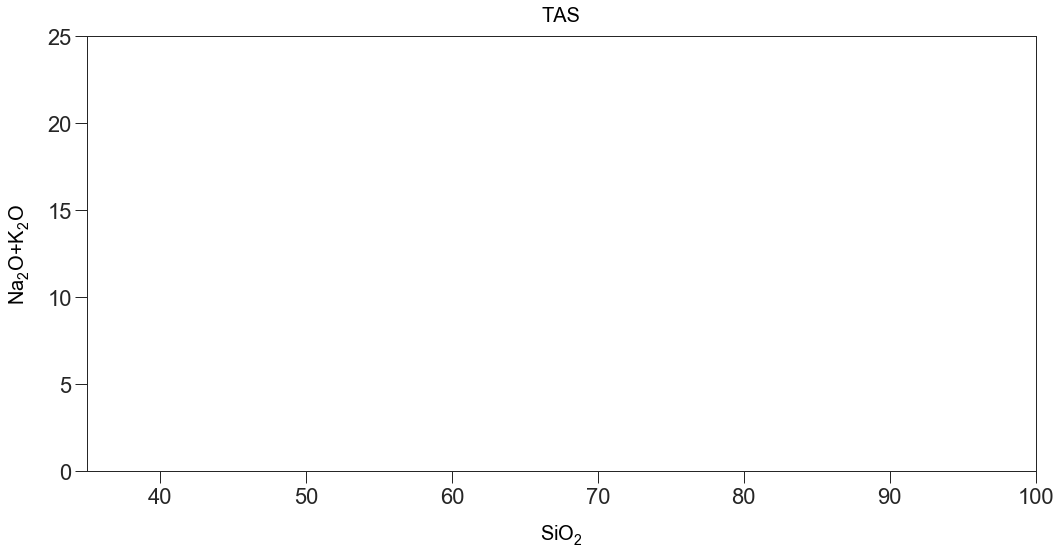

In [16]:
####################################################################################################################
#This bit lets you pick the model, and also what elements you are plotting 
model='Moore'
x="SiO2"
y1="Na2O"
y2="K2O"
####################################################################################################################
#This bit sets up the plot, the axis, the figure size, and adds the TAS fields.
fig, ax1 = plt.subplots(figsize = (17,8))
ax1.set_xlim([35, 100])
ax1.set_ylim([0, 25])
font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }
ax1.set_title('TAS',
        fontdict= font, pad = 15)
plt.xlabel('SiO$_2$', fontdict=font, labelpad = 15)
plt.ylabel('Na$_2$O+K$_2$O', fontdict=font, labelpad = 15)
tasplot.add_LeMaitre_fields(ax1)
##########################################################################################
#This bit plots the data just for the model you have selected.
if model=='Eguchi':
    plt.scatter(df_Eguchi_CO2[x],df_Eguchi_CO2[y1]+df_Eguchi_CO2[y2],
            s=40,edgecolors='k', marker='o', facecolors='aqua', label = 'Eguchi-CO2')
if model=='Magmasat':
    plt.scatter(df_MagmaSat_H2O['SiO2'],df_MagmaSat_H2O['Na2O+K2O'],
            s=100, edgecolors='gray', facecolors='silver', marker='s', label = 'MagmaSat-H2O')
    plt.scatter(df_MagmaSat_CO2['SiO2'],df_MagmaSat_CO2['Na2O+K2O'],
            s=100, edgecolors='k', facecolors='silver', marker='o', label = 'MagmaSat-CO2')
    plt.scatter(df_MagmaSat_CO2H2O['SiO2'],df_MagmaSat_CO2H2O['Na2O+K2O'],
            s=100, edgecolors='k', facecolors='silver', marker='d', label = 'MagmaSat-H2O-CO2')
if model=='Shishkina':
    plt.scatter(df_Shishkina_H2O[x],df_Shishkina_H2O[y1]+df_Shishkina_H2O[y2],
            s=50, edgecolors='k', facecolors='darkorange', marker='s', label = 'Shishkina-H2O')
    plt.scatter(df_Shishkina_CO2[x],df_Shishkina_CO2[y1]+df_Shishkina_CO2[y2],
            s=50, edgecolors='k', facecolors='darkorange', marker='o', label = 'Shishkina-CO2')
if model=='Iacono':
    plt.scatter(df_Iacono_H2O[x],df_Iacono_H2O[y1]+df_Iacono_H2O[y2],
            s=70,edgecolors='k', facecolors='magenta', marker='s', label = 'Iacono-H2O')
    plt.scatter(df_Iacono_CO2H2O[x],df_Iacono_CO2H2O[y1]+df_Iacono_CO2H2O[y2],
            s=50, edgecolors='k',  facecolors='magenta', marker='d', label = 'Iacono-CO2-H2O')
if model=='Allison':
    plt.scatter(df_Allison_CO2[x],df_Allison_CO2[y1]+df_Allison_CO2[y2],
            s=60,edgecolors='k', marker='o', facecolors='yellow', label = 'Allison-CO2')
if model=='Moore':
    plt.scatter(df_Moore_H2O[x],df_Moore_H2O[y1]+df_Moore_H2O[y2], 
            s=70,edgecolors='k', facecolors='lime', marker='s', label = 'Moore-H2O')
if model=='Dixon':
    plt.scatter(df_Dixon_CO2[x],df_Dixon_CO2[y1]+df_Dixon_CO2[y2],
            s=40, edgecolors='k', marker='o', facecolors='blue',label = 'Dixon-CO2')
    plt.scatter(df_Dixon_H2O[x],df_Dixon_H2O[y1]+df_Dixon_H2O[y2],
            s=150, edgecolors='k', facecolors='blue', marker='s', label = 'Dixon-H2O')
####################################################################################################################
#This bit plots your own data
plt.scatter(data[x],data[y1]+data[y2],
            s=150, edgecolors='magenta', facecolors='k', marker='P', label = 'User Data')
#####################################################################################################################
# This bit removes the TAS words if you don't want them
for t in ax1.texts[:]:
    t.remove()
    #ax1.remove_artist(t)
print(ax1.texts)
########################################################################################################################
#This bit adds a legend
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
fig.tight_layout()
fig.savefig('CalibrationRange.svg', dpi = 90)


# TAS to help choose between different compositions in Allison et al. (2019) 

In [ ]:
x="SiO2"
y1="Na2O"
y2="K2O"
####################################################################################################################
#This bit sets up the plot, the axis, the figure size, and adds the TAS fields.
fig, ax1 = plt.subplots(figsize = (17,8))
ax1.set_xlim([35, 100])
ax1.set_ylim([0, 25])
font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }
ax1.set_title('TAS',
        fontdict= font, pad = 15)
plt.xlabel('SiO$_2$', fontdict=font, labelpad = 15)
plt.ylabel('Na$_2$O+K$_2$O', fontdict=font, labelpad = 15)
tasplot.add_LeMaitre_fields(ax1)
plt.scatter(df_Allison_CO2_Vesuvius[x],df_Allison_CO2_Vesuvius[y1]+df_Allison_CO2_Vesuvius[y2], edgecolors='k', marker='s', s=70, label = 'Allison-Vesuvius')
plt.scatter(df_Allison_CO2_SFVF[x],df_Allison_CO2_SFVF[y1]+df_Allison_CO2_SFVF[y2], edgecolors='k', marker='s', s=70,label = 'Allison-SFVF')
plt.scatter(df_Allison_CO2_Etna[x],df_Allison_CO2_Etna[y1]+df_Allison_CO2_Etna[y2], edgecolors='k', marker='s', s=70,label = 'Allison-Etna')
plt.scatter(df_Allison_CO2_Erebus[x],df_Allison_CO2_Erebus[y1]+df_Allison_CO2_Erebus[y2], edgecolors='k',  s=70,marker='s', label = 'Allison-Erebus')
plt.scatter(df_Allison_CO2_SunsetCrater[x],df_Allison_CO2_SunsetCrater[y1]+df_Allison_CO2_SunsetCrater[y2],  s=70,edgecolors='k', marker='s',label = 'Allison-Sunset')
#####################################################################################################################
#This bit plots your own data
plt.scatter(data[x],data[y1]+data[y2],
            s=150, edgecolors='w', facecolors='k', marker='P', label = 'User Data')
#####################################################################################################################
# This bit removes the TAS words if you don't want them
for t in ax1.texts[:]:
    t.remove()
    #ax1.remove_artist(t)
print(ax1.texts)
########################################################################################################################
#This bit adds a legend
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
fig.tight_layout()
fig.savefig('CalibrationRange.svg', dpi = 90)

# Any X-Y plot for any model
- Note that for magmasat we have only compiled SiO2, and Na2O+K2O

In [ ]:
####################################################################################################################
#This bit lets you pick the model, and also what elements you are plotting 
model='Allison'
x="SiO2"
y="Al2O3"

####################################################################################################################
#This bit sets up the plot, the axis, the figure size, and adds the TAS fields.
fig, ax1 = plt.subplots(figsize = (17,8))
#ax1.set_xlim([35, 100])
#ax1.set_ylim([0, 25])
font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }
ax1.set_title('TAS',
        fontdict= font, pad = 15)
plt.xlabel(x, fontdict=font, labelpad = 15)
plt.ylabel(y, fontdict=font, labelpad = 15)

##########################################################################################
#This bit plots the data just for the model you have selected.
if model=='Eguchi':
    plt.scatter(df_Eguchi_CO2[x],df_Eguchi_CO2[y],
            s=40,edgecolors='k', marker='o', facecolors='aqua', label = 'Eguchi-CO2')

if model=='Shishkina':
    plt.scatter(df_Shishkina_H2O[x],df_Shishkina_H2O[y],
            s=50, edgecolors='k', facecolors='darkorange', marker='s', label = 'Shishkina-H2O')
    plt.scatter(df_Shishkina_CO2[x],df_Shishkina_CO2[y],
            s=50, edgecolors='k', facecolors='darkorange', marker='o', label = 'Shishkina-CO2')
if model=='Iacono':
    plt.scatter(df_Iacono_H2O[x],df_Iacono_H2O[y],
            s=70,edgecolors='k', facecolors='magenta', marker='s', label = 'Iacono-H2O')
    plt.scatter(df_Iacono_CO2H2O[x],df_Iacono_CO2H2O[y],
            s=50, edgecolors='k',  facecolors='magenta', marker='d', label = 'Iacono-CO2-H2O')
if model=='Allison':
    #plt.scatter(df_Allison_CO2[x],df_Allison_CO2[y],
            #s=60,edgecolors='k', marker='o', facecolors='yellow', label = 'Allison-CO2')
    plt.scatter(df_Allison_CO2_Vesuvius[x],df_Allison_CO2_Vesuvius[y1]+df_Allison_CO2_Vesuvius[y2], edgecolors='k', marker='s', s=70, label = 'Allison-Vesuvius')
    plt.scatter(df_Allison_CO2_SFVF[x],df_Allison_CO2_SFVF[y], edgecolors='k', marker='s', s=70,label = 'Allison-SFVF')
    plt.scatter(df_Allison_CO2_Etna[x],df_Allison_CO2_Etna[y], edgecolors='k', marker='s', s=70,label = 'Allison-Etna')
    plt.scatter(df_Allison_CO2_Erebus[x],df_Allison_CO2_Erebus[y], edgecolors='k',  s=70,marker='s', label = 'Allison-Erebus')
    plt.scatter(df_Allison_CO2_SunsetCrater[x],df_Allison_CO2_SunsetCrater[y],  s=70,edgecolors='k', marker='s',label = 'Allison-Sunset')

if model=='Moore':
    plt.scatter(df_Moore_H2O[x],df_Moore_H2O[y], 
            s=70,edgecolors='k', facecolors='lime', marker='s', label = 'Moore-H2O')
if model=='Dixon':
    plt.scatter(df_Dixon_CO2[x],df_Dixon_CO2[y],
            s=40, edgecolors='k', marker='o', facecolors='blue',label = 'Dixon-CO2')
    plt.scatter(df_Dixon_H2O[x],df_Dixon_H2O[y],
            s=150, edgecolors='k', facecolors='blue', marker='s', label = 'Dixon-H2O')
####################################################################################################################
#This bit plots your own data
plt.scatter(data[x],data[y],
            s=150, edgecolors='magenta', facecolors='k', marker='P', label = 'User Data')

########################################################################################################
#This bit adds a legend
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
fig.tight_layout()
fig.savefig('CalibrationRange.svg', dpi = 90)

# Specific checks for Iacono-Marziano 
Iacono-Marziano recommend that users use extreme caution when extrapolating MgO, FeO and Na2O out of the range of their calibration dataset.

In [ ]:
# MgO and FeO, K2O and NA2O for Iacono
x="MgO"
y="FeOT"
x2 ="K2O"
y2="Na2O"

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,8))

font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }

#plt.xlabel('Temp (C)', fontdict=font, labelpad = 15)
ax1.set_xlabel('MgO')
ax1.set_ylabel('FeO$_T$')
ax2.set_xlabel('K$_2$O')
ax2.set_ylabel('Na$_2$O')


#ADD both H2O and CO2 iacono here!

ax1.scatter(df_Iacono_CO2H2O[x],df_Iacono_CO2H2O[y], edgecolors='k', facecolors='magenta', s=50, marker='d', label = 'Iacono-CO2H2O')
ax1.scatter(df_Iacono_H2O[x],df_Iacono_H2O[y], edgecolors='k', facecolors='magenta', s=50, marker='s', label = 'Iacono-CO2H2O')
ax1.scatter(data[x],data[y], s=150, edgecolors='k', facecolors='k', marker='P', label = 'User Data')


ax2.scatter(df_Iacono_CO2H2O[x2],df_Iacono_CO2H2O[y2], edgecolors='k', facecolors='magenta', s=50,marker='d', label = 'Iacono-CO2H2O')
ax2.scatter(df_Iacono_H2O[x2],df_Iacono_H2O[y2],edgecolors='k', facecolors='magenta', s=50, marker='s', label = 'Iacono-CO2H2O')
ax2.scatter(data[x2],data[y2], s=150, edgecolors='k', facecolors='k', marker='P', label = 'User Data')

ax1.legend(loc=1, prop={'size': 10})
ax2.legend(loc=1, prop={'size': 10})
fig.tight_layout()
#fig.savefig('Choise_Name_Here.png', dpi = 90)

# Calculating compositional parameter using Dixon equation
This graph is to assess the suitability of the VolatileCalc simplification of Dixon, 1997, where the original PI term is replaced with a SiO2 dependence based on the correlation in the North Arch Dataset (between 40-49 wt%). The blue and dashed green line shows the Pi value the model is using. Please note:
1. If your samples have >49 wt% SiO2, the simplified compositional parameter is constant (dashed line), despite the fact that full Pi value may be changing. 
2. If your samples with 40-49 wt% SiO2 do not lie close to the North Arch Dataset in SiO2 vs. PI space, this simplification is likely invalid. 

In [ ]:
PI_Dixon_UserSample=-6.5*(data["SiO2norm"]+data["Al2O3norm"])+20.17*(data["CaOnorm"]+0.8*data["K2Onorm"]+0.7*data["Na2Onorm"]+0.4*data["MgOnorm"]+0.4*data["FeOnorm"])
PI_Dixon_NorthArch=-6.5*(Dixondata["SiO2norm"]+Dixondata["Al2O3norm"])+20.17*(Dixondata["CaOnorm"]+0.8*Dixondata["K2Onorm"]+0.7*Dixondata["Na2Onorm"]+0.4*Dixondata["MgOnorm"]+0.4*Dixondata["FeOnorm"])
x=np.linspace(40, 49, 100)
x2=np.linspace(49, 52, 10) # once SiO2>49, Pi is fixed at that for SiO2=49
y2=10.9-0.214*49*np.ones(len(x2)) 
PiCalc=10.9-0.214*x
fig, ax1 = plt.subplots(figsize = (17,8))
ax1.set_xlabel('SiO2')
ax1.set_ylabel('PI')
ax1.set_title('PI vs. SiO$_2$',
          fontdict= font, pad = 15)
ax1.set_xlim([40, 52])
ax1.set_ylim([0, 2.5])

ax1.scatter(Dixondata["SiO2"], PI_Dixon_NorthArch, label='North Arch')
ax1.scatter(data['SiO2'],PI_Dixon_UserSample, s=100, edgecolors='magenta', facecolors='k', marker='P', label = 'User Data')
ax1.plot(x, PiCalc, label='SiO$_2$ vs. PI for Dixon, 1997')
ax1.plot(x2, y2, label='VolatileCalc Extrapolation', linestyle='--')
ax1.legend(loc=1, prop={'size': 10})
ax2.legend(loc=1, prop={'size': 10})

plt.legend()

# Calculating min and max P and T for the calibration dataset of each model
- note, for some models (e.g. Moore et al., 1998), the suggested pressure range is smaller than the entire calibration range, due to the inclusion of a smaller number of experiments run at higher pressure. 

In [ ]:
# Calculating limits - Magmasat read off their graph
minDixonP_H2O=df_Dixon_H2O["P (bars)"].min()
maxDixonP_H2O=df_Dixon_H2O["P (bars)"].max()
minDixonT_H2O=1200
maxDixonT_H2O=1200

minDixonP_CO2=df_Dixon_CO2["P (bars)"].min()
maxDixonP_CO2=df_Dixon_CO2["P (bars)"].max()
minDixonT_CO2=1200
maxDixonT_CO2=1200

minDixonP_CO2H2O=df_Dixon_CO2["P (bars)"].min()
maxDixonP_CO2H2O=df_Dixon_CO2["P (bars)"].max()
minDixonT_CO2H2O=1200
maxDixonT_CO2H2O=1200


minMooreP_H2O=df_Moore_H2O["P (bars)"].min()
maxMooreP_H2O=df_Moore_H2O["P (bars)"].max()
maxMooreP_H2O_Pub=3000
minMooreT_H2O=df_Moore_H2O["T (C)"].min()
maxMooreT_H2O=df_Moore_H2O["T (C)"].max()

  
minIaconoP_H2O=df_Iacono_H2O["P (bar)"].min()
maxIaconoP_H2O=df_Iacono_H2O["P (bar)"].max()
minIaconoT_H2O=df_Iacono_H2O["T (K)"].min()-273.15
maxIaconoT_H2O=df_Iacono_H2O["T (K)"].max()-273.15   

minIaconoP_CO2H2O=df_Iacono_CO2H2O["P (bar)"].min()
maxIaconoP_CO2H2O=df_Iacono_CO2H2O["P (bar)"].max()
minIaconoT_CO2H2O=df_Iacono_CO2H2O["T (K)"].min()-273.15
maxIaconoT_CO2H2O=df_Iacono_CO2H2O["T (K)"].max()-273.15

minEguchiP_CO2=10000*df_Eguchi_CO2["P(GPa)"].min()
maxEguchiP_CO2=10000*df_Eguchi_CO2["P(GPa)"].max()
minEguchiT_CO2=df_Eguchi_CO2["T(°C)"].min()
maxEguchiT_CO2=df_Eguchi_CO2["T(°C)"].max() 

minAllisonP_CO2=df_Allison_CO2["Pressure (bars)"].min()
maxAllisonP_CO2=df_Allison_CO2["Pressure (bars)"].max()
minAllisonT_CO2=1200
maxAllisonT_CO2=1200

minShishkinaP_H2O=10*df_Shishkina_H2O["P (MPa)"].min()
maxShishkinaP_H2O=10*df_Shishkina_H2O["P (MPa)"].max()
minShishkinaT_H2O=df_Shishkina_H2O["T (°C)"].min()
maxShishkinaT_H2O=df_Shishkina_H2O["T (°C)"].max() 

minShishkinaP_CO2=10*df_Shishkina_CO2["P (MPa)"].min()
maxShishkinaP_CO2=10*df_Shishkina_CO2["P (MPa)"].max()
minShishkinaT_CO2=df_Shishkina_CO2["T (°C)"].min()
maxShishkinaT_CO2=df_Shishkina_CO2["T (°C)"].max() 
# Measured off Magmasat graph
minMagmasatP_CO2=10*0
maxMagmasatP_CO2=10*3000
minMagmasatT_CO2=1139
maxMagmasatT_CO2=1730
minMagmasatP_H2O=10*0
maxMagmasatP_H2O=10*2000
minMagmasatT_H2O=550
maxMagmasatT_H2O=1418



# Plot user data on PT space for CO2 and CO2-H2O models

In [ ]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,8), sharey=True)

font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }
ax1.set_ylim([0, 35000])
#plt.xlabel('Temp (C)', fontdict=font, labelpad = 15)
ax1.set_xlabel('Temperature (C)')
ax1
ax2.set_xlabel('Temperature (C)')
ax1.set_ylabel('Pressure (bars)')
ax1.set_title('CO$_2$, mixed CO$_2$-H$_2$O',
          fontdict= font, pad = 15)
ax2.set_title('H$_2$O',
          fontdict= font, pad = 15)
#plt.ylabel('Pressure (MPa)', fontdict=font, labelpad = 15)
# CO2 and Mixed
ax1.fill([minEguchiT_CO2, minEguchiT_CO2, maxEguchiT_CO2, maxEguchiT_CO2], 
        [minEguchiP_CO2, maxEguchiP_CO2, maxEguchiP_CO2, minEguchiP_CO2], 
         "cyan", alpha=0.7, label='Eguchi CO2', zorder=1) 

ax1.fill([minMagmasatT_CO2, minMagmasatT_CO2, maxMagmasatT_CO2, maxMagmasatT_CO2], 
        [minMagmasatP_CO2, maxMagmasatP_CO2, maxMagmasatP_CO2, minMagmasatP_CO2], 
        "gray",  edgecolor='k',alpha=0.5, linewidth=1, label='MagmaSat H2O', zorder=2)

ax1.fill([minIaconoT_CO2H2O, minIaconoT_CO2H2O, maxIaconoT_CO2H2O, maxIaconoT_CO2H2O], 
        [minIaconoP_CO2H2O, maxIaconoP_CO2H2O, maxIaconoP_CO2H2O, minIaconoP_CO2H2O],
        "magenta",  alpha=0.7, label='Iacono H2O-CO2',  zorder=3) 




ax1.fill([minShishkinaT_CO2, minShishkinaT_CO2, maxShishkinaT_CO2, maxShishkinaT_CO2], 
        [minShishkinaP_CO2, maxShishkinaP_CO2, maxShishkinaP_CO2, minShishkinaP_CO2],
        "orange", alpha=0.7, label='Shishkina CO2', zorder=4) 


ax1.plot([maxDixonT_CO2H2O, maxDixonT_CO2H2O],
         [minDixonP_CO2H2O, maxDixonP_CO2H2O],'-b', linewidth=4, label='Dixon H2O',  zorder=11) # 1-20 kbar, 1200C

ax1.plot([1200, 1200],
         [minAllisonP_CO2, maxAllisonP_CO2],'-y', linewidth=5, label='Allison CO2', zorder=12) # 1-20 kbar, 1200C
ax1.legend(loc=1, prop={'size': 10})
ax1.scatter(data["Temp"],data["Press"],  s=150, edgecolors='w', facecolors='k', marker='P', label = 'User Data', zorder=100 )

ax2.fill([minMagmasatT_H2O, minMagmasatT_H2O, maxMagmasatT_H2O, maxMagmasatT_H2O], 
        [minMagmasatP_H2O, maxMagmasatP_H2O, maxMagmasatP_H2O, minMagmasatP_H2O], 
        "gray",  edgecolor='k',alpha=0.5, linewidth=1, label='MagmaSat H2O')


ax2.fill([minIaconoT_H2O, minIaconoT_H2O, maxIaconoT_H2O, maxIaconoT_H2O], 
        [minIaconoP_H2O, maxIaconoP_H2O, maxIaconoP_H2O, minIaconoP_H2O], "magenta",  alpha=1, label='Iacono H2O') 
# Note, have used published range, rather than range of dataset
ax2.fill([minMooreT_H2O, minMooreT_H2O, maxMooreT_H2O, maxMooreT_H2O], 
         [minMooreP_H2O, maxMooreP_H2O_Pub, maxMooreP_H2O_Pub, minMooreP_H2O],
        "lime", alpha=0.5, linewidth=1, label='Moore H2O') 

ax2.legend(loc=1, prop={'size': 10})


ax2.fill([minShishkinaT_H2O, minShishkinaT_H2O, maxShishkinaT_H2O, maxShishkinaT_H2O], 
        [minShishkinaP_H2O, maxShishkinaP_H2O, maxShishkinaP_H2O, minShishkinaP_H2O], "orange", alpha=1, label='Shishkina H2O') 


ax2.plot([maxDixonT_CO2H2O, maxDixonT_CO2H2O], [minDixonP_CO2H2O, maxDixonP_CO2H2O],'-b', linewidth=4, label='Dixon H2O') # 1-20 kbar, 1200C
ax2.scatter(data["Temp"],data["Press"],  s=150, edgecolors='w', facecolors='k', marker='P', label = 'User Data', zorder=100 )
###############################

fig.tight_layout()
fig.savefig('PT Ranges CO2 and mixed CO2-H2O.svg', dpi = 100)
